## 데이터 출처: [Home Credit Default Risk](https://www.kaggle.com/c/home-credit-default-risk/data)

## 프로젝트 개요

**[원문]**

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

Home Credit Group

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.


While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

**[번역]**

많은 사람들은 신용 기록이 불충분하거나 존재하지 않아 대출을 받기 위해 애를 씁니다. 불행히도,이 인구는 종종 신뢰할 수없는 대출 기관에 의해 이용됩니다.

주택 신용 그룹

주택 신용 기관(Home Credit)은 긍정적이고 안전한 차용 경험을 제공함으로써 비은행 인구를위한 재정적 포용을 확대하기 위해 노력합니다. 이 소외된 인구가 긍정적 인 대출 경험을 갖도록하기 위해 주택 신용 기관(Home Credit)은 고객의 상환 능력을 예측하기 위해 전화 및 거래 정보를 포함한 다양한 대체 데이터를 사용합니다.

주택 신용 기관(Home Credit)은 여러분의 다양한 통계 데이터 분석 능력과 머신러닝 방법을 활용하여, 고객이 은행 부채 상환능력에 대한 예측을 진행해 주세요. 그렇게하면 상환 가능한 고객이 거부되지 않고 성공적으로 원금, 만기 및 상환 일정에 따라 대출을 받을 수 있습니다.

## 프로젝트 목표
1. `pandas`, `numpy`, `scikit-learn` 패키지를 활용하여 데이터 병합, 전처리, 피처 공학(feature engineering)을 진행합니다.
2. 데이터에 대한 시각화를 통해 주요(Key) 데이터를 추출합니다.
3. 머신러닝 모델을 만들고 예측 합니다.
4. Kaggle에 제출해보고, 목표 점수까지 획득할 수 있도록 수정 및 보완합니다.


## 프로젝트 구성
* 데이터 로드 (load data)
* 데이터 시각화 (visualization)
* 데이터 전처리 (pre-processing)
* 머신러닝을 활용하여 baseline 모델링 (modeling for baseline)
* 평가지표 생성 (evalutation)
* 모델 앙상블, 데이터 전처리 개선으로 모델의 성능을 업그레이드 하여, 목표 점수에 도달


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from IPython.display import Image

warnings.filterwarnings('ignore')
%matplotlib inline

SEED = 34

## 데이터 살펴보기

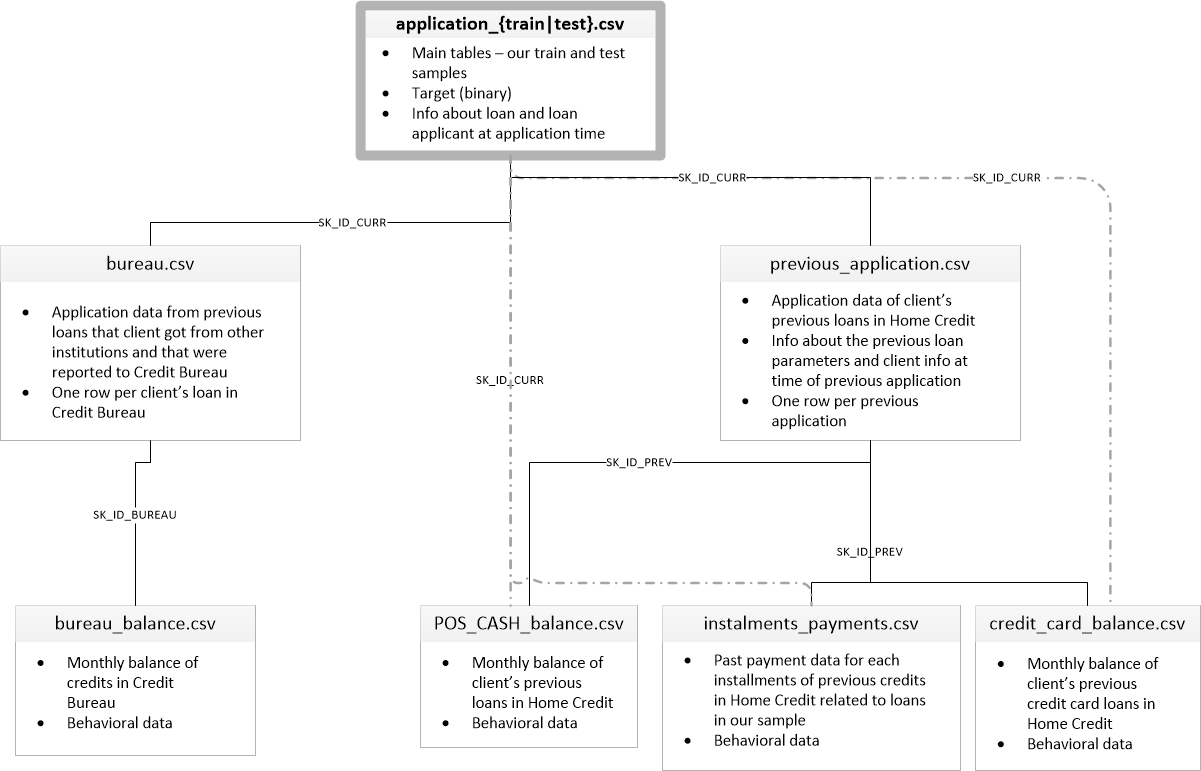

In [2]:
Image('data/home_credit.png')

큰일입니다. 복잡한 고객의 채무관계 파악을 위해서 주택 신용 기관(Home Credit)에서 고객 정보를 여러 파일에 저장했습니다. (실제 사례에서도 당연히, 이렇게 데이터들이 산재되어 있습니다.)

우리는, 이 복잡한 데이터를 분석하기 쉽도록 하나의 **데이터프레임(DataFrame)** 에 `merge` 하는 작업과 전처리(pre-processing)하는 과정을 진행하겠습니다.

**[중요]**

여러 개의 파일들을 하나의 데이터프레임으로 `merge` 할 때, `merge`의 중심이 되는 ID 값이 위의 도표에 친절히 나와있습니다.

너무 걱정 마세요! 제가 예제를 한 번 보여 드리면, 쉽게 따라 하실 수 있으니깐요.

## 파일에 대한 설명

**application_train.csv**, **application_test.csv**

- 2개의 파일이 바로 메인이 되는 파일입니다. 
- 제공되는 다른 파일 정보의 **중심이 되는 데이터**를 포함하고 있습니다. 
- 하나의 행은 데이터 샘플에서 하나의 대출을 의미합니다.

**bureau.csv**

- 신용 기관 (Credit Bureau) 에 보고된 다른 금융 기관에서 제공한 모든 고객의 이전 신용 정보를 포함합니다. (고객이 이전에 대출이 있는 경우)
- 샘플의 모든 대출에는 신청 날짜 이전에 고객이 신용 관리국에 보유한 크레딧 수만큼의 행이 있습니다.

**bureau_balance.csv**

- 신용 기관 (Credit Bureau)에서 이전 신용의 월별 잔액을 나타냅니다.

**POS_CASH_balance.csv**

- 이전 POS (판매 시점) 및 신청자가 주택 신용으로 보유한 현금 대출의 월별 잔액 스냅 샷입니다.

**credit_card_balance.csv**

- 신청자가 주택 신용으로 보유한 이전 시용카드의 월별 잔액 스냅샷입니다.

**previous_application.csv**

- 샘플에 대출이있는 고객의 주택 신용 대출에 대한 모든 이전 신청.

**installments_payments.csv**

- 샘플의 대출과 관련하여 이전에 지불한 주택 신용에 대한 상환 내역.

## Load Files

In [3]:
train = pd.read_csv('data/application_train.csv')
test = pd.read_csv('data/application_test.csv')

In [4]:
train.shape, test.shape

((307511, 122), (48744, 121))

In [5]:
train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


**`TARGET` 컬럼**

우리가 예측해야할 `label`입니다.

In [6]:
train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

`all_data`라는 변수에 `train` 데이터와 `test` 데이터를 합쳐 줍니다.

전처리를 위하여 임시로 합쳐줍니다. 나중에 다시 train/test 로 분할 해야하기 때문에, 순서가 섞이면 안됩니다.

In [7]:
all_data = pd.concat([train, test], sort=False)

## 데이터 구조도

자주 데이터 구조도를 확인해가면서 **전처리 작업**을 진행합니다.

필요하면 별도의 창으로 띄워 놓거나, 프린트해서 보면서 풀어나가는 것도 방법입니다.

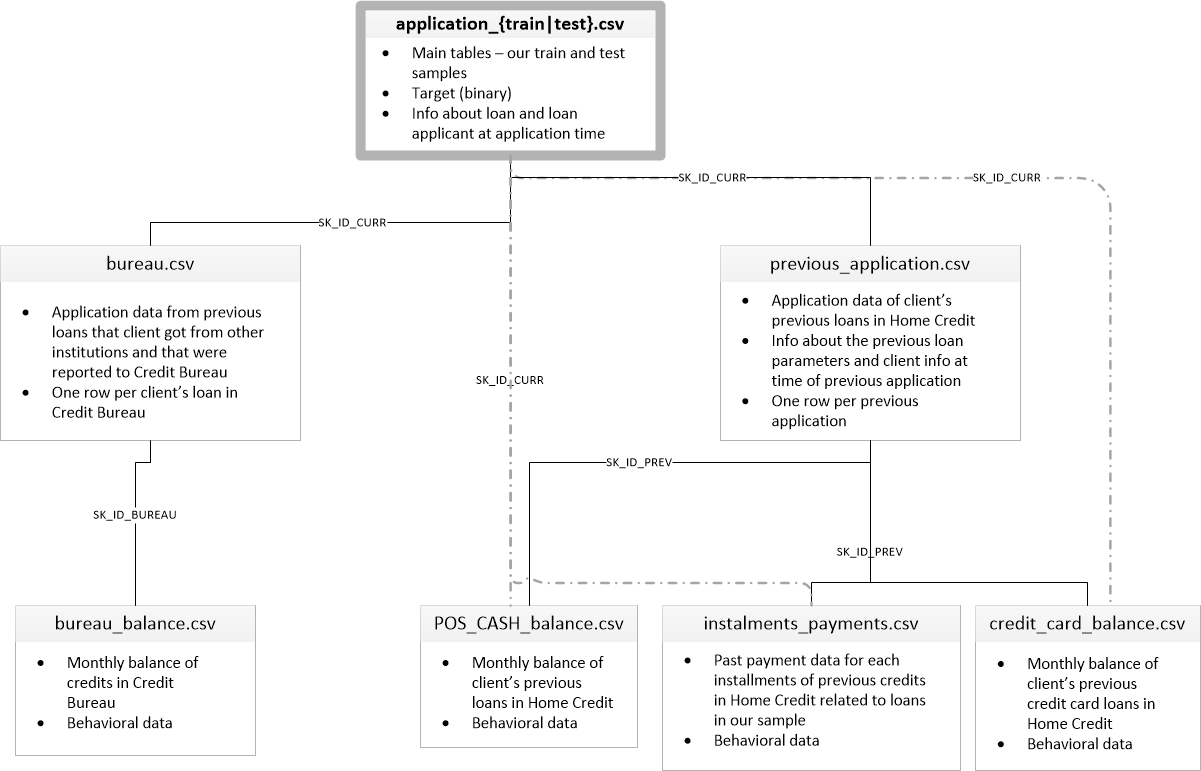

In [8]:
Image('data/home_credit.png')

## 전처리

### STEP 1. Bureau & Bureau Balance 데이터 병합

`bureau.csv` 파일부터 차근차근 데이터를 살펴보겠습니다.

In [9]:
bureau = pd.read_csv('data/bureau.csv')
print(bureau.shape)
bureau.head()

(1716428, 17)


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [10]:
bureau_balance = pd.read_csv('data/bureau_balance.csv')
print(bureau_balance.shape)
bureau_balance.head()

(27299925, 3)


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


`SK_ID_BUREAU`로 bureau_balance 데이터와 bureau를 병합해주겠습니다.

하지만, bureau_balance의 `SK_ID_BUREAU` 키 값이 여러개 행을 포함합니다.

그렇기 때문에, 우리는 `groupby`를 통해 하나의 `SK_ID_BUREAU`에 대한 다양한 통계 정보를 bureau에 병합해주도록 하겠습니다.

In [11]:
right = bureau_balance.groupby('SK_ID_BUREAU')['MONTHS_BALANCE'] \
            .agg(['sum', 'count', 'mean', 'std', 'min', 'max', 'median'])

In [12]:
right.head()

,sum,count,mean,std,min,max,median
SK_ID_BUREAU,,,,,,,
5001709,-4656,97,-48.0,28.145456,-96,0,-48.0
5001710,-3403,83,-41.0,24.103942,-82,0,-41.0
5001711,-6,4,-1.5,1.290994,-3,0,-1.5
5001712,-171,19,-9.0,5.627314,-18,0,-9.0
5001713,-231,22,-10.5,6.493587,-21,0,-10.5


하나의 `SK_ID_BUREAU` 고유 키에 대한 다양한 통계 값으로 **right** 데이터프레임을 생성했습니다.

**right** 데이터프레임을 bureau 데이터프레임에 병합(merge) 해주도록 하겠습니다.

In [13]:
merged = pd.merge(bureau, right, on='SK_ID_BUREAU', how='left')

병합은 **left: bureau, right: right, 기준컬럼: SK_ID_BUREAU, how:는 bureau 기준이니 left 옵션**을 주도록 하였습니다.

**내가 병합을 잘 했는지 안했는지 확인하는 Tip!**

bureau가 합치기 전 row의 갯수와, 합친 후의 row의 갯수가 동일해야합니다. (bureau 기준으로 합쳤을 경우)

In [14]:
bureau.shape[0], merged.shape[0]

(1716428, 1716428)

In [15]:
# merge가 성공적으로 되었는지 체크 코드
# 해당 셀을 실행시 에러가 없어야 합니다.
assert bureau.shape[0] == merged.shape[0]

In [16]:
merged.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,...,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,sum,count,mean,std,min,max,median
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,...,Consumer credit,-131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,...,Credit card,-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,...,Consumer credit,-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,...,Credit card,-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,...,Consumer credit,-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


동일하다면, 잘 합쳐 졌습니다!!!

### STEP 2. 이제는 merged 데이터프레임을 all_data에 합쳐 보겠습니다.

In [17]:
merged.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,...,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,sum,count,mean,std,min,max,median
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,...,Consumer credit,-131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,...,Credit card,-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,...,Consumer credit,-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,...,Credit card,-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,...,Consumer credit,-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
all_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0.0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0.0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0.0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0.0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


`SK_ID_CURR`을 기준으로 합치면 유효할 것 같습니다.

In [19]:
all_data.shape, merged.shape

((356255, 122), (1716428, 24))

**all_data**를 기준으로 **merged**데이터프레임을 병합하되, all_data를 기준으로 병합합니다.

In [20]:
all_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0.0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0.0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0.0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0.0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
merged.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,...,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,sum,count,mean,std,min,max,median
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,...,Consumer credit,-131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,...,Credit card,-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,...,Consumer credit,-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,...,Credit card,-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,...,Consumer credit,-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


위의 `merged` 데이터 를 보면 **SK_ID_CURR** 컬럼에 중복 값이 들어가 있습니다.

병합할 때, `SK_ID_CURR` 키로 병합하게 되면, 꼬일 수 있습니다.

병합할 키 값은 항상 **고유**하게 유지해야합니다.

그러면, merged 데이터를 `SK_ID_CURR` 컬럼에 대하여 groupby 하여 수치형 데이터 / 카테고리형 데이터로 구분하여 전처리 해주도록 하겠습니다.

In [22]:
numerical_cols = merged.select_dtypes(exclude='object').columns.to_list()
categorical_cols = merged.select_dtypes(include='object').columns.to_list()

In [23]:
numerical_cols

['SK_ID_CURR',
 'SK_ID_BUREAU',
 'DAYS_CREDIT',
 'CREDIT_DAY_OVERDUE',
 'DAYS_CREDIT_ENDDATE',
 'DAYS_ENDDATE_FACT',
 'AMT_CREDIT_MAX_OVERDUE',
 'CNT_CREDIT_PROLONG',
 'AMT_CREDIT_SUM',
 'AMT_CREDIT_SUM_DEBT',
 'AMT_CREDIT_SUM_LIMIT',
 'AMT_CREDIT_SUM_OVERDUE',
 'DAYS_CREDIT_UPDATE',
 'AMT_ANNUITY',
 'sum',
 'count',
 'mean',
 'std',
 'min',
 'max',
 'median']

`SK_ID_BUREAU` 컬럼은 index 형 컬럼 이므로, 제거하도록 합니다. 통계 수치를 통합할 때 id 값은 제거 한 후 통계값을 산출합니다.

In [24]:
numerical_cols.remove('SK_ID_BUREAU')

In [25]:
numerical_cols

['SK_ID_CURR',
 'DAYS_CREDIT',
 'CREDIT_DAY_OVERDUE',
 'DAYS_CREDIT_ENDDATE',
 'DAYS_ENDDATE_FACT',
 'AMT_CREDIT_MAX_OVERDUE',
 'CNT_CREDIT_PROLONG',
 'AMT_CREDIT_SUM',
 'AMT_CREDIT_SUM_DEBT',
 'AMT_CREDIT_SUM_LIMIT',
 'AMT_CREDIT_SUM_OVERDUE',
 'DAYS_CREDIT_UPDATE',
 'AMT_ANNUITY',
 'sum',
 'count',
 'mean',
 'std',
 'min',
 'max',
 'median']

`SK_ID_CURR` 키를 categorical_col 리스트에 추가 합니다. 나중에 이 키가 누락되면 병합시 키 오류가 발생합니다.

In [26]:
categorical_cols.append('SK_ID_CURR')

In [27]:
categorical_cols

['CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE', 'SK_ID_CURR']

이제 **numerical** 데이터와 **categorical** 데이터를 각각 `SK_ID_CURR`로 groupby 하여 전처리를 진행하고,

numerical_right, categorical_right 변수에 임시로 데이터프레임을 저장하도록 하겠습니다.

**numerical_right**: 수치형 데이터 만 groupby

In [28]:
numerical_right = merged[numerical_cols] \
            .groupby('SK_ID_CURR') \
            .agg(['sum', 'count', 'mean', 'std', 'min', 'max', 'median']).reset_index()
print(numerical_right.shape)
numerical_right.head()

(305811, 134)


SK_ID_CURR DAYS_CREDIT                                                    \
                     sum count         mean         std   min  max  median   
0     100001       -5145     7  -735.000000  489.942514 -1572  -49  -857.0   
1     100002       -6992     8  -874.000000  431.451040 -1437 -103 -1042.5   
2     100003       -5603     4 -1400.750000  909.826128 -2586 -606 -1205.5   
3     100004       -1734     2  -867.000000  649.124025 -1326 -408  -867.0   
4     100005        -572     3  -190.666667  162.297053  -373  -62  -137.0   

  CREDIT_DAY_OVERDUE        ...   max             median                   \
                 sum count  ...   min  max median    sum count       mean   
0                  0     7  ...   0.0  0.0    0.0  -82.5     7 -11.785714   
1                  0     8  ... -32.0  0.0  -18.5 -175.0     8 -21.875000   
2                  0     4  ...   NaN  NaN    NaN    0.0     0        NaN   
3                  0     2  ...   NaN  NaN    NaN    0.0     0        NaN   
4                  0     3  ...   0.0  0.0    0.0   -9.0     3  -3.000000   

                                
         std   min  max median  
0   8.025258 -25.5 -0.5  -14.0  
1  12.176529 -39.5 -1.5  -26.0  
2        NaN   NaN  NaN    NaN  
3        NaN   NaN  NaN    NaN  
4   2.645751  -6.0 -1.0   -2.0  

[5 rows x 134 columns]

**categorical_right**: 카테고리 데이터 만 groupby

In [29]:
categorical_right = merged[categorical_cols] \
            .groupby('SK_ID_CURR') \
            .agg(['size', 'nunique']).reset_index()
print(categorical_right.shape)
categorical_right.head()

(305811, 7)


SK_ID_CURR CREDIT_ACTIVE         CREDIT_CURRENCY         CREDIT_TYPE        
                      size nunique            size nunique        size nunique
0     100001             7       2               7       1           7       1
1     100002             8       2               8       1           8       2
2     100003             4       2               4       1           4       2
3     100004             2       1               2       1           2       1
4     100005             3       2               3       1           3       2

### Q1. all_data 기준으로 right 데이터프레임을 병합해 주세요

all_data를 기준으로 right 데이터프레임을 병합하고, all_data 변수에 다시 할당해 주세요

### ✔︎ 리뷰어 피드백
- 매우 잘 하셨습니다. 기본적으로 코딩에선 간결성 (적은 코드로 동일한 결과를 얻는 것)이 중요한데요.
- 아래처럼 코드를 좀더 간결히할수 있습니다. 지금 방식도 결과는 동일하니 참고만 해주세요.

`all_data = all_data.merge(numerical_right, on='SK_ID_CURR', how='left')\
                   .merge(categorical_right, on='SK_ID_CURR', how='left')
`

In [30]:
# 여기에 코드를 입력해 주세요 #
all_data = pd.merge(all_data, numerical_right, on='SK_ID_CURR', how='left')
all_data = pd.merge(all_data, categorical_right, on='SK_ID_CURR', how='left')
###############################
all_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,"(median, std)","(median, min)","(median, max)","(median, median)","(CREDIT_ACTIVE, size)","(CREDIT_ACTIVE, nunique)","(CREDIT_CURRENCY, size)","(CREDIT_CURRENCY, nunique)","(CREDIT_TYPE, size)","(CREDIT_TYPE, nunique)"
0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,12.176529,-39.5,-1.5,-26.0,8.0,2.0,8.0,1.0,8.0,2.0
1,100003,0.0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,NaN,NaN,NaN,NaN,4.0,2.0,4.0,1.0,4.0,2.0
2,100004,0.0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,NaN,NaN,NaN,NaN,2.0,1.0,2.0,1.0,2.0,1.0
3,100006,0.0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0.0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0


In [31]:
# 검증코드
# 본 코드셀을 실행 시켜 에러가 발생하지 않아야 합니다.
assert all_data.shape == (356255, 261)

### STEP 3. POS_CASH_balance 전처리 및 병합

자, 이번에는 **POS_CASH_balance**데이터를 **all_data**에 병합해보겠습니다.

In [32]:
pos_cash_balance = pd.read_csv('data/POS_CASH_balance.csv')
print(pos_cash_balance.shape)
pos_cash_balance.head()

(10001358, 8)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [33]:
all_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,"(median, std)","(median, min)","(median, max)","(median, median)","(CREDIT_ACTIVE, size)","(CREDIT_ACTIVE, nunique)","(CREDIT_CURRENCY, size)","(CREDIT_CURRENCY, nunique)","(CREDIT_TYPE, size)","(CREDIT_TYPE, nunique)"
0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,12.176529,-39.5,-1.5,-26.0,8.0,2.0,8.0,1.0,8.0,2.0
1,100003,0.0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,NaN,NaN,NaN,NaN,4.0,2.0,4.0,1.0,4.0,2.0
2,100004,0.0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,NaN,NaN,NaN,NaN,2.0,1.0,2.0,1.0,2.0,1.0
3,100006,0.0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0.0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0


### Q2. pos_cash_balance 데이터를 `SK_ID_CURR` 기준으로 group 하고, 다음 6개의 column에 대하여 aggregate 합니다.

- sum, mean, std, min, max, median
- groupby 한 데이터프레임은 **right** 에 할당합니다.

### ✔︎ 리뷰어 피드백
- 정확하게 잘 수행하셨습니다.
- group by 의 경우, 실무에서도 매우 빈번히 사용하는 함수이므로 (통계분석 및 전처리 등 수많은 부분에서 사용됨)
- 반복연습을 통해 본인의 것으로 만드시고 익숙해지시는걸 추천드립니다.

In [34]:
# 여기에 코드를 입력해 주세요 #
columns = ['sum', 'mean', 'std', 'min', 'max', 'median']
right = pos_cash_balance.groupby(['SK_ID_CURR']).agg(columns).reset_index()
###############################
right.head()

SK_ID_CURR SK_ID_PREV                                                 \
                    sum          mean            std      min      max   
0     100001   14256401  1.584045e+06  254189.675833  1369693  1851984   
1     100002   19737542  1.038818e+06       0.000000  1038818  1038818   
2     100003   64334628  2.297665e+06  329593.011850  1810518  2636178   
3     100004    6256056  1.564014e+06       0.000000  1564014  1564014   
4     100005   27452425  2.495675e+06       0.000000  2495675  2495675   

             MONTHS_BALANCE                        ...    SK_DPD          \
      median            sum       mean        std  ...       std min max   
0  1369693.0           -653 -72.555556  20.863312  ...  2.333333   0   7   
1  1038818.0           -190 -10.000000   5.627314  ...  0.000000   0   0   
2  2396755.0          -1226 -43.785714  24.640162  ...  0.000000   0   0   
3  1564014.0           -102 -25.500000   1.290994  ...  0.000000   0   0   
4  2495675.0           -220 -20.000000   3.316625  ...  0.000000   0   0   

         SK_DPD_DEF                                     
  median        sum      mean       std min max median  
0    0.0          7  0.777778  2.333333   0   7    0.0  
1    0.0          0  0.000000  0.000000   0   0    0.0  
2    0.0          0  0.000000  0.000000   0   0    0.0  
3    0.0          0  0.000000  0.000000   0   0    0.0  
4    0.0          0  0.000000  0.000000   0   0    0.0  

[5 rows x 37 columns]

In [35]:
# 검증코드
# 본 코드셀을 실행 시켜 에러가 발생하지 않아야 합니다.
assert right.shape == (337252, 37)

### Q3. right 데이터프레임을 all_data에 병합합니다.

- 기준 컬럼은 `SK_ID_CURR` 입니다.
- 병합된 컬럼은 all_data에 할당합니다.

### ✔︎ 리뷰어 피드백

- 잘 하셨습니다. 지금과 같이 하셔도 무방하고
- 아래와 같이 코딩하는 것도 동일한 결과를 얻을수 있으니 참고만해주세요.
- merge 함수를 이용한 조인시 on 에 들어가는 key 값에 중복이 있으면 원치 않은 결과가 나올수 있으니 항상 유의해주세요.

`all_data = all_data.merge(right, on='SK_ID_CURR', how='left')`

In [36]:
# 여기에 코드를 입력해 주세요 #
all_data = pd.merge(all_data, right, on='SK_ID_CURR', how='left')
all_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,"(SK_DPD, std)","(SK_DPD, min)","(SK_DPD, max)","(SK_DPD, median)","(SK_DPD_DEF, sum)","(SK_DPD_DEF, mean)","(SK_DPD_DEF, std)","(SK_DPD_DEF, min)","(SK_DPD_DEF, max)","(SK_DPD_DEF, median)"
0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100003,0.0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0.0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0.0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0.0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# 검증코드
# 본 코드셀을 실행 시켜 에러가 발생하지 않아야 합니다.
assert all_data.shape == (356255, 297)

위에서 진행했던 방식과 동일한 방식으로 다른 파일에도 적용해 볼 수 있습니다.

더 높은 점수 획득을 위해서는 **다양한 데이터**, **많은 데이터**가 있다면, 도움이 될 것 입니다.

하지만, 반복되는 코드가 많으니, 나머지는 여러분들에게 맡기겠습니다. 추가로 스스로 해보고 싶으신 분들은 다른 데이터를 병합해보는 연습을 많이 해보시길 추천합니다!

## 시각화

### Q4. 간단한 시각화를 통해 우리가 예측해야할 데이터 샘플의 차이를 살펴 봅니다.

- 시각화 대상 컬럼: `TARGET` (예측값)
    
데이터의 불균형도를 확인합니다.

### ✔︎ 리뷰어 피드백

- 시각화를 정확하게 잘 하셨습니다.
- 시각화를 통해 밸런스가 어떠한지, 항목별 빈도나 분포를 파악하기 좋으니 자주 활용해주세요.
- 또 시각화를 통해 분석뿐만 아니라 이상치 파악 및 퀄리티 확보 등 자주 사용하니,
- 다양한 시각화 방법을 알아두면 좋습니다(특히 막대 그래프, 라인 그래프, 산포도 등이 많이 사용됩니다)

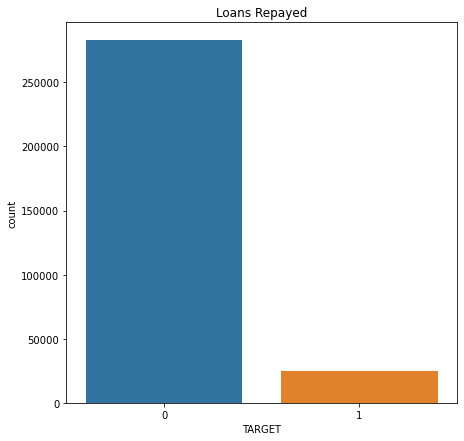

In [38]:
plt.figure(figsize = (7, 7))
# 코드를 입력해 주세요
sns.countplot(x='TARGET', data=train)
plt.title('Loans Repayed')
plt.show()

## 문자형 컬럼에 대한 처리 (수치형 컬럼 변환)

In [39]:
# 카테고리형 (문자형) 컬럼만 뽑아서 보겠습니다.
cat_cols = all_data.select_dtypes(include='object').columns
all_data[cat_cols].head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN


### Q5. 카테고리형 컬럼에 대하여 LabelEncoding을 해주세요. 

- 어떤 패키지/라이브러리를 활용하든 상관없습니다.
- 문자형 컬럼을 숫자형으로 인코딩합니다.

### ✔︎ 리뷰어 피드백
    
- 잘하셨습니다. `all_data[cat_cols] = all_data[cat_cols].astype(str)` 와 같이
- 변수의 포멧을 명시해주는 것이 에러를 줄이는 방법이니, 항상 변수의 포멧을 항상 신경써주세요.
- 포멧이 다를 경우, 이상하게 계산되거나 조인이 안되는 등 많은 문제를 발생시킬수 있습니다.
- 그리고 텍스트 자체로는 모델이 인식을 못하니 인코딩이 반드시 필요합니다.
- 모델에 넣기 전에 반드시 고려해주시고 fitting 을 진행해야하니 유념해주세요.    

In [40]:
# 여기에 코드를 입력해 주세요 #
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

all_data[cat_cols] = all_data[cat_cols].astype(str)
all_data[cat_cols] = all_data[cat_cols].apply(le.fit_transform)
###############################
# 결과 예시
all_data[cat_cols].head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,0,1,0,1,6,7,4,3,1,8,6,5,3,0,5,0
1,0,0,0,0,1,4,1,1,1,3,1,39,3,0,0,0
2,1,1,1,1,6,7,4,3,1,8,1,11,0,1,7,2
3,0,0,0,1,6,7,4,0,1,8,6,5,0,1,7,2
4,0,1,0,1,6,7,4,3,1,3,4,37,0,1,7,2


### 다음 STEP: 빈 값(NaN)에 대한 처리를 진행합니다. 빈 값은 임의로 모든 값을 '0'으로 채워주겠습니다.

In [41]:
all_data = all_data.fillna(0)

In [42]:
all_data.isnull().sum()

SK_ID_CURR              0
TARGET                  0
NAME_CONTRACT_TYPE      0
CODE_GENDER             0
FLAG_OWN_CAR            0
                       ..
(SK_DPD_DEF, mean)      0
(SK_DPD_DEF, std)       0
(SK_DPD_DEF, min)       0
(SK_DPD_DEF, max)       0
(SK_DPD_DEF, median)    0
Length: 297, dtype: int64

## train / test 의 데이터를 분할합니다.

In [43]:
train_data = all_data[:len(train)]
test_data = all_data[len(train):]
test_data = test_data.drop('TARGET', 1)

In [44]:
# 검증코드
assert train_data.shape[0] == train.shape[0]

In [45]:
# 검증코드
assert test_data.shape[0] == test.shape[0]

**train_data, test_data로 분할**해 주었습니다. 이제는 검증세트까지 만들어 보겠습니다.

### Q6. train_test_split 을 활용하여, 데이터를 분할해 주세요

train_test_split()의 다음 2개의 파라미터에 대하여 고정 값으로 입력해 주세요

### ✔︎ 리뷰어 피드백
- 잘 하셨습니다. 어떻게 데이터셋을 분할하는지에 따라 모델의 성능에 큰 영향을 주는 부분이므로
- 이 부분 역시 세심하게 진행하셔야 합니다. 지금과 같이 불균형 데이터셋의 경우, 사례가 각각에 적절히 분포되도록
- stratify 와 같은 계층형 샘플링을 진행하시면 좋습니다.
- 지금 하신 것과 같이 변수를 이용하면, 추후에 재활용하는 데 도움이되니 좋은 습관이 맞습니다.

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
random_state=34
test_size=0.2

In [48]:
# 여기에 코드를 입력해 주세요 #
data = train_data.drop('TARGET', 1)
target = train_data['TARGET']
x_train, x_valid, y_train, y_valid = train_test_split(data, target, stratify=target, random_state=random_state, test_size=test_size)
###############################

## 모델링

In [49]:
from sklearn.ensemble import RandomForestClassifier

### Q7. RandomForestClassifier 앙상블 모델을 활용하여 모델을 학습합니다.

### ✔︎ 리뷰어 피드백
- 훌륭하게 잘 하셨습니다. 
- 지금은 기본 파라메터만 이용했으나 실제로는 파라메터 옵션들을 정의하고 grid search 방식으로 최적의 파라메터를 찾기도 합니다.
- grid search 와 별개로 random search 방식도 있으니, 구글링을 통해서 학습해보시면 더 좋을 것 같습니다. 

In [50]:
# 코드를 입력해 주세요 #
model = RandomForestClassifier(n_estimators = 300, max_depth =10)
model.fit(x_train, y_train)
########################

RandomForestClassifier(max_depth=10, n_estimators=300)

아래 코드는 각각의 상위 20개의 모델 예측에 영향을 준 **feature**들을 살펴봅니다.

**importance**가 높을 수록 모델 예측에 많은 기여가 되는 컬럼입니다.

In [51]:
fi = pd.DataFrame(list(zip(x_train.columns, model.feature_importances_))).sort_values(by=1, ascending=False).reset_index(drop=True).head(20)
fi.columns = ['feature', 'importance']
fi

,feature,importance
0,EXT_SOURCE_2,0.099354
1,EXT_SOURCE_3,0.072795
2,EXT_SOURCE_1,0.025997
3,DAYS_BIRTH,0.019500
4,"(DAYS_CREDIT, median)",0.017830
5,"(DAYS_CREDIT, mean)",0.017620
6,"(DAYS_CREDIT, max)",0.012222
7,"(DAYS_CREDIT_UPDATE, median)",0.011525
8,DAYS_EMPLOYED,0.009982
9,NAME_EDUCATION_TYPE,0.009891


이번 대회에서는 제출 기준을 `TARGET`이 1이 될 확률을 제출하는 것입니다.

predict() 함수는 class를 예측해주지만, predict_proba()는 각각의 class에 대한 확률값을 return합니다.

우리는 1이될 확률을 구해야합니다.

In [52]:
pred = model.predict_proba(test_data)
# 1이 될 확률을 구합니다.
pred[:, 1]

array([0.09856041, 0.1233485 , 0.05854903, ..., 0.05989297, 0.05186922,
       0.11217768])

**sample_submission** 파일에 우리가 예측한 정답값을 입력합니다.

In [53]:
submission = pd.read_csv('data/sample_submission.csv')
# 정답 입력
submission['TARGET'] = pred[:, 1]
submission.head()

,SK_ID_CURR,TARGET
0,100001,0.098560
1,100005,0.123348
2,100013,0.058549
3,100028,0.038208
4,100038,0.128298


submission 파일을 csv 포맷의 파일로 내보냅니다.

대부분의 Kaggle 대회에서는 csv 파일 제출을 요구합니다.

In [54]:
from datetime import datetime

timestring = datetime.now().strftime('%m-%d-%H-%M-%S')
filename = '{}-homecredit-submit.csv'.format(timestring)
submission.to_csv(filename, index=False)

이제 날짜와 시간이 입혀진 정답 파일(.csv)이 나왔습니다.

**Late Submission**을 해보고, 우리의 점수가 리더보드에 어느 수준인지 확인합니다.

제출은 [이곳](https://www.kaggle.com/c/home-credit-default-risk/submit)에서 Late Submission 클릭 후 - 자신이 예측한 모델의 예측값이 들어있는 .csv 파일 업로드 - 제출

### Extra Q. 전처리, 모델 변경 등을 통해서 더 나은 예측 모델을 만들어서 캐글 상위권에 도전합니다 (0.73 이상)

hint: RandomForestClassifier 단일 모델로도 0.73 이상 달성할 수 있습니다.
다만, hyperparameter를 튜닝해야합니다.

* max_features, max_depth, n_estimators를 유심히 살펴보세요
* [도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

### ✔︎ 리뷰어 피드백
- 추가 과제까지 훌륭하게 잘 수행하셨습니다.
- 정확도 73이 나오는것이 쉽지 않은데 매우 잘하셨습니다.

In [57]:
# 이곳에 코드를 입력해 주세요

model = RandomForestClassifier(n_estimators=200, max_features=0.7,max_depth=12, bootstrap = True)
model.fit(x_train, y_train)

pred = model.predict_proba(test_data)
submission = pd.read_csv('data/sample_submission.csv')
submission['TARGET'] = pred[:, 1]

timestring = datetime.now().strftime('%m-%d-%H-%M-%S')
filename = '{}-homecredit-submit.csv'.format(timestring)
submission.to_csv(filename, index=False)

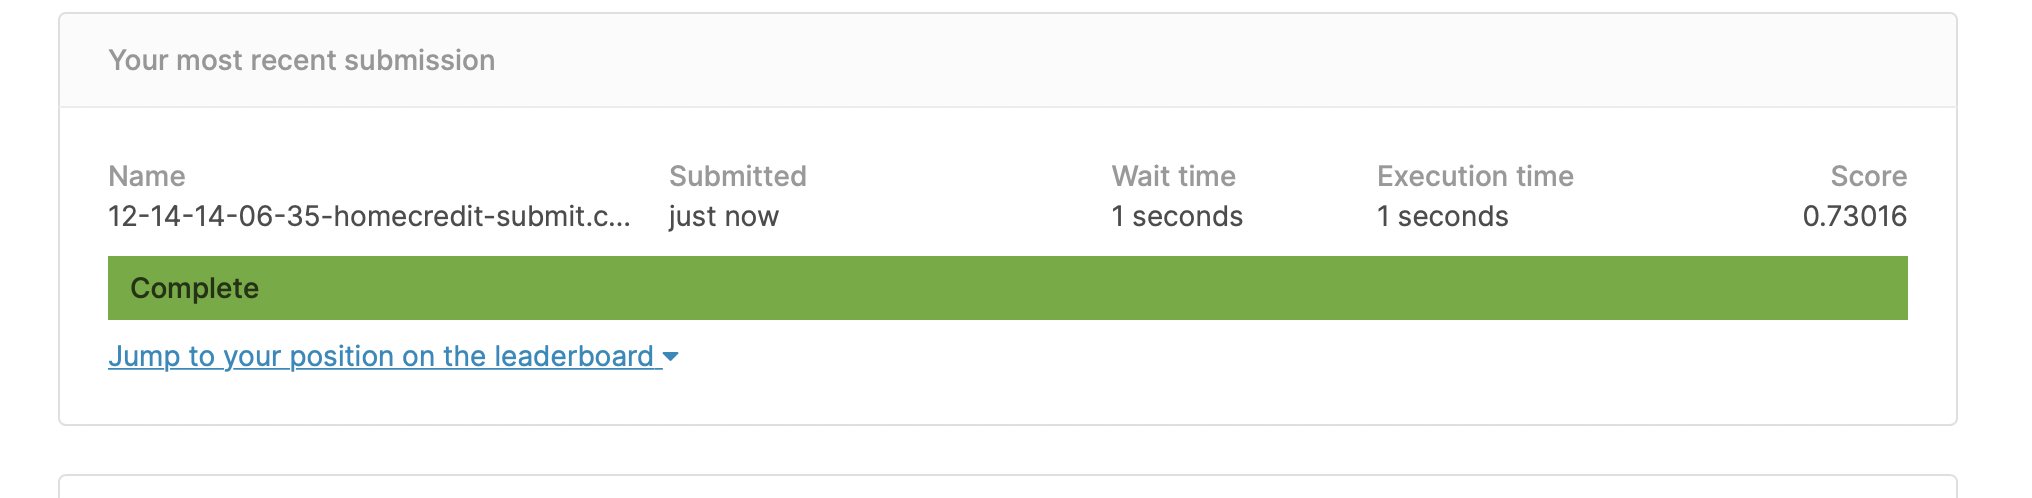

In [59]:
# 전처리 이전 randomforest 모델 score
Image('data/randomforest.png')

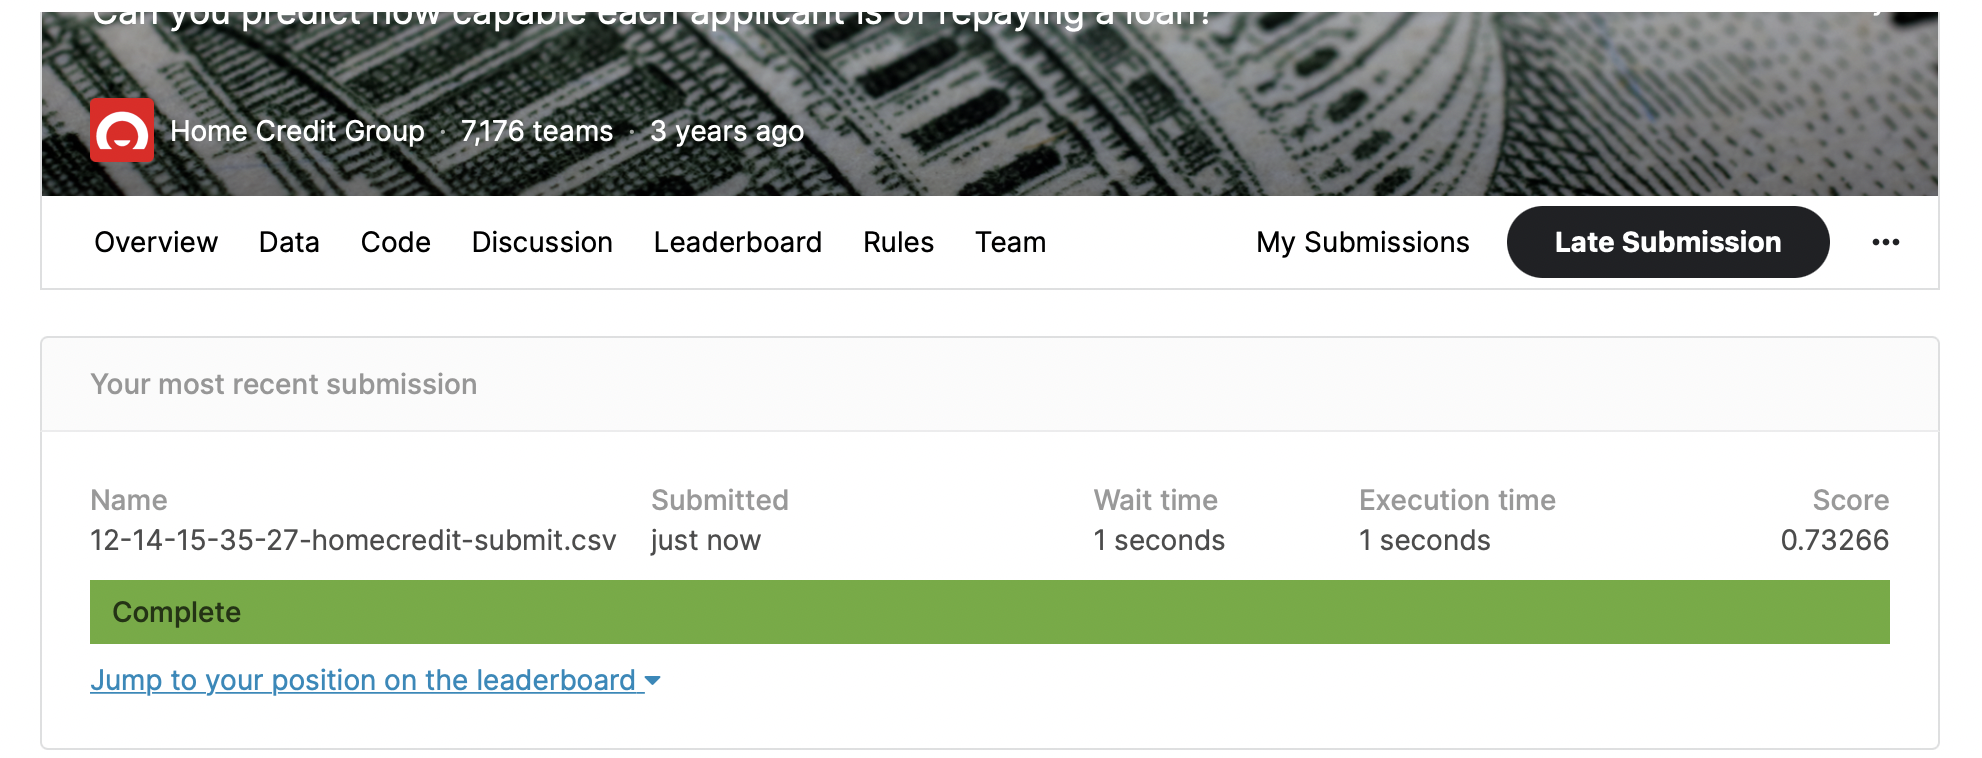

In [61]:
# 전처리 이후 randomfroest 모델 score

Image('data/randomforest_hyperparameter_tuning.png')